In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

## Data processing

In [2]:
Country_in_Interest = ['Canada', 'France', 'Germany', 'United Kingdom', 'United States', 'Italy', 'India']

In [5]:
apple_data_raw = pd.read_csv('./data/applemobilitytrends-2021-05-07.csv')
traffic_data = apple_data_raw[apple_data_raw['geo_type']=='country/region']
traffic_data = traffic_data.drop(columns=['geo_type','alternative_name','sub-region','country'])
traffic_data = traffic_data.groupby('region').mean()
traffic_data = traffic_data.reset_index().melt('region')
traffic_data.columns=['Country','Date','Traffic']
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])
traffic_data = traffic_data[traffic_data['Country'].isin(Country_in_Interest)]
traffic_data = traffic_data[~traffic_data['Date'].isin(['2020-05-11','2020-05-12'])]

C:\Users\mkof6\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
who_data_raw = pd.read_csv('./data/WHO-COVID-19-global-data.csv')
who_data = who_data_raw.drop(columns=['Country_code','WHO_region','Cumulative_cases','New_deaths','Cumulative_deaths'])
who_data.columns = ['Date', 'Country', "Cases"]
who_data['Date']=pd.to_datetime(who_data['Date'])
Country_dic = {'The United Kingdom':'United Kingdom', 'United States of America':'United States'}
who_data['Country'] = who_data['Country'].replace(Country_dic)
who_data = who_data[who_data['Country'].isin(Country_in_Interest)]

In [9]:
finaldf = pd.merge(traffic_data,who_data, on=['Country','Date'], how='inner')

In [10]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3353 entries, 0 to 3352
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  3353 non-null   object        
 1   Date     3353 non-null   datetime64[ns]
 2   Traffic  3346 non-null   float64       
 3   Cases    3353 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 131.0+ KB


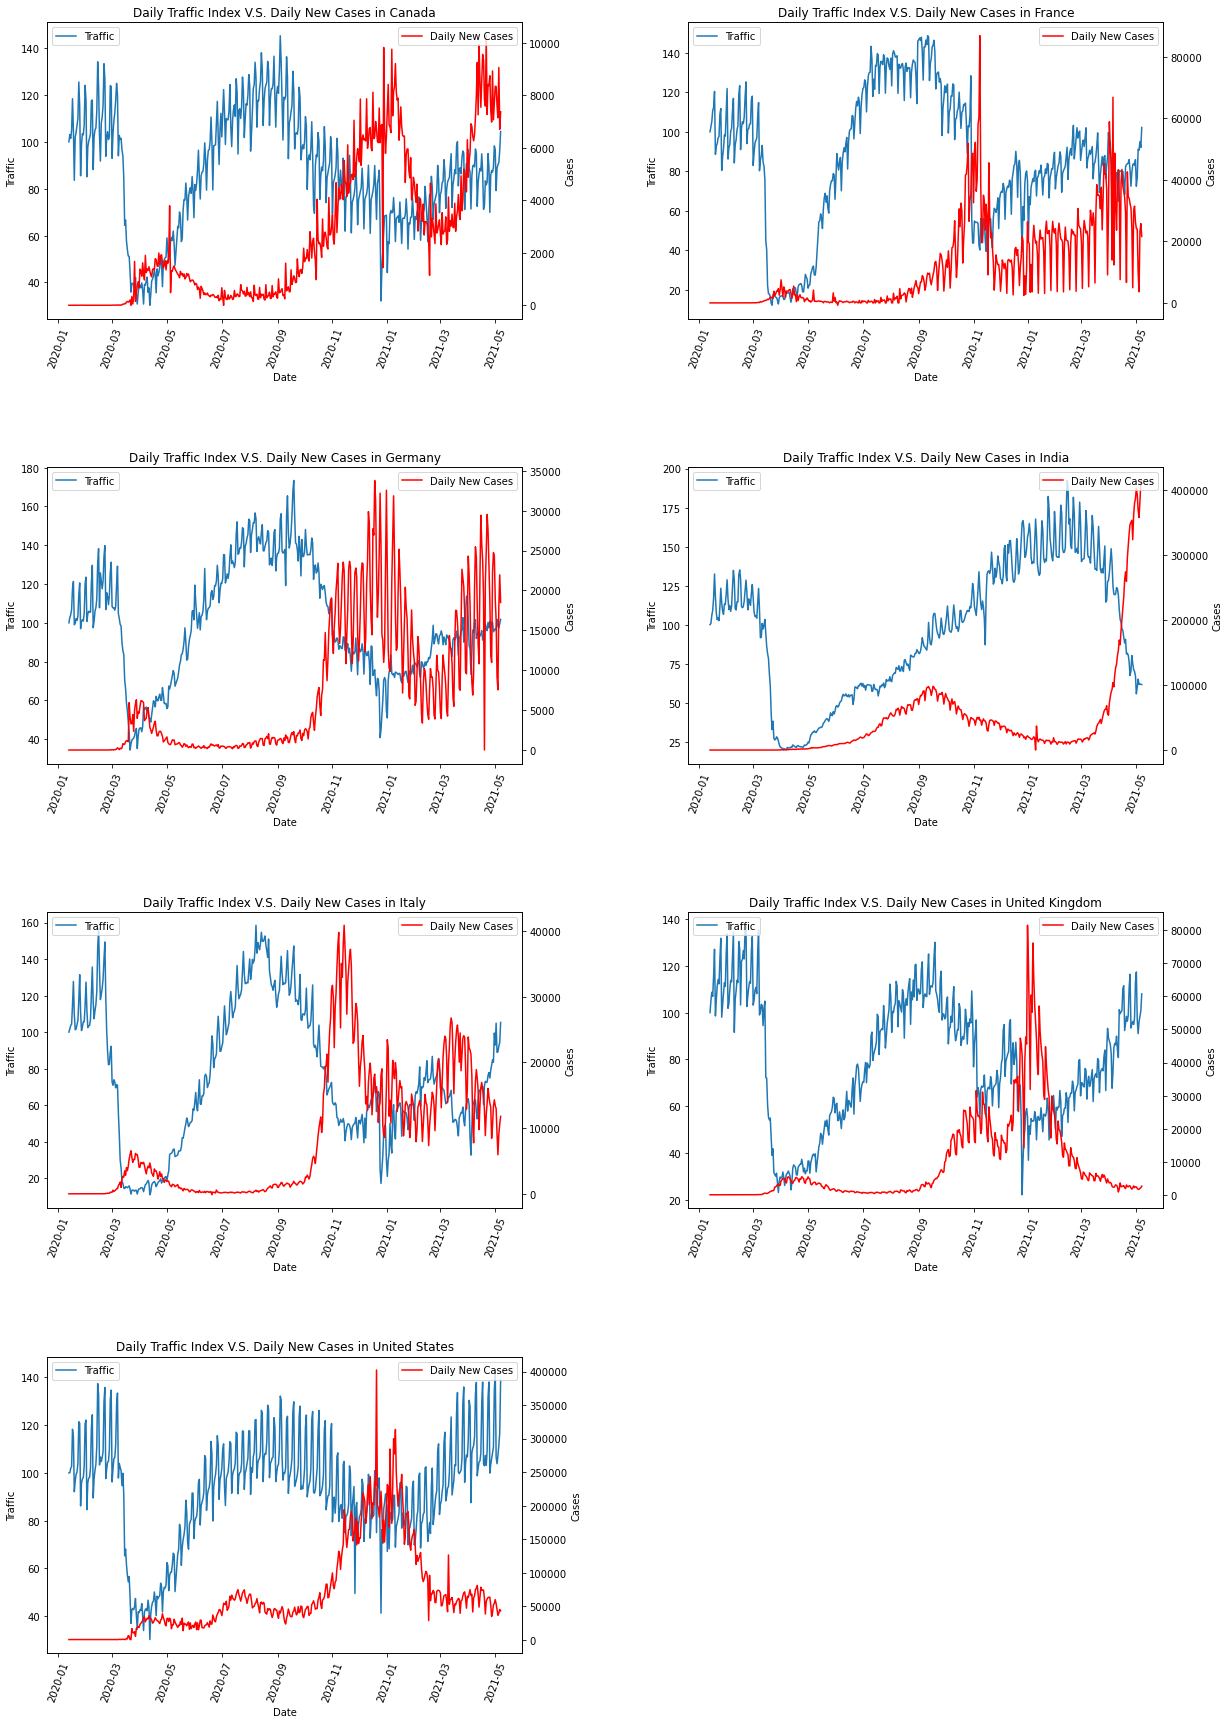

In [11]:
# Now, since we've got 7 countries in the list, let's plot our data into a 4x2
i=1
for country in finaldf['Country'].unique():
    df = finaldf[finaldf['Country']==country]
    fig = plt.gcf()
    fig.set_size_inches(20, 30)
    ax = fig.add_subplot(4, 2, i)

    sns.lineplot(x=df['Date'],y=df['Traffic'], ax=ax, label='Traffic', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=df['Date'],y=df['Cases'], ax=ax2, color='red', label = 'Daily New Cases', legend=False)
    
    ax.set_title('Daily Traffic Index V.S. Daily New Cases in {}'.format(country))
    plt.gcf().subplots_adjust(hspace=0.5, wspace=0.35)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
    ax.legend(loc='upper left')
    ax2.legend(loc = 'upper right')
    i+=1